In [196]:
library(dplyr)
library(tidyverse)
library(ggplot2)

In [197]:
sd <- read.csv("speed_dating_clean.csv")

In [198]:
sd1_1 <- sd %>% select(iid, gender, attr1_1, sinc1_1, fun1_1, intel1_1, amb1_1) 
sd1_1 <- sd1_1[!duplicated(sd1_1$iid),]

In [199]:
# Approach: ranking of characteristics determined by highest average value
sd1_1a1v1 <- sd1_1 %>% group_by(gender) %>% 
          summarise(attractive = mean(attr1_1, na.rm=TRUE),
                    sincere = mean(sinc1_1, na.rm=TRUE),
                    fun = mean(fun1_1, na.rm=TRUE),
                    intelligence = mean(intel1_1, na.rm=TRUE),
                    ambitious = mean(amb1_1, na.rm=TRUE))
sd1_1a1v1
sd1_1a1v2 <- round(sd1_1a1v1)
sd1_1a1v2

gender,attractive,sincere,fun,intelligence,ambitious
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,20.39249,21.02424,19.83476,24.01446,14.734041
1,29.96861,18.45032,19.70764,21.89405,9.979392


gender,attractive,sincere,fun,intelligence,ambitious
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,20,21,20,24,15
1,30,18,20,22,10


In [200]:
sd1_1a1v3 <- pivot_longer(data=sd1_1a1v2,
             cols="attractive":"ambitious",
             names_to = "attribute",
             values_to = "avg_score")
#sd1_1a1v3$gender <- as.factor(sd1_1a1v3$gender)
sd1_1a1v3

gender,attribute,avg_score
<dbl>,<chr>,<dbl>
0,attractive,20
0,sincere,21
0,fun,20
0,intelligence,24
0,ambitious,15
1,attractive,30
1,sincere,18
1,fun,20
1,intelligence,22


In [209]:
# male calculations
sdmale <- filter(sd1_1a1v3,gender==1)
sdmale$fraction = sdmale$avg_score / sum(sdmale$avg_score)
sdmale$ymax = cumsum(sdmale$fraction)
sdmale$ymin = c(0, head(sdmale$ymax, n=-1))
sdmale$labelPosition <- (sdmale$ymax + sdmale$ymin) / 2
sdmale$label <- paste0(sdmale$attribute, "\n", sdmale$avg_score, "%")

# set colors
malcols <- c("thistle1","plum","pink","palevioletred2","maroon")

# male graph
male <- ggplot(sdmale, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=attribute)) +
  geom_rect() +
  geom_text( x=3.5, aes(y=labelPosition, label=label), size=6) +
  #scale_fill_brewer(palette=4) +
  scale_fill_manual(values = malcols) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")

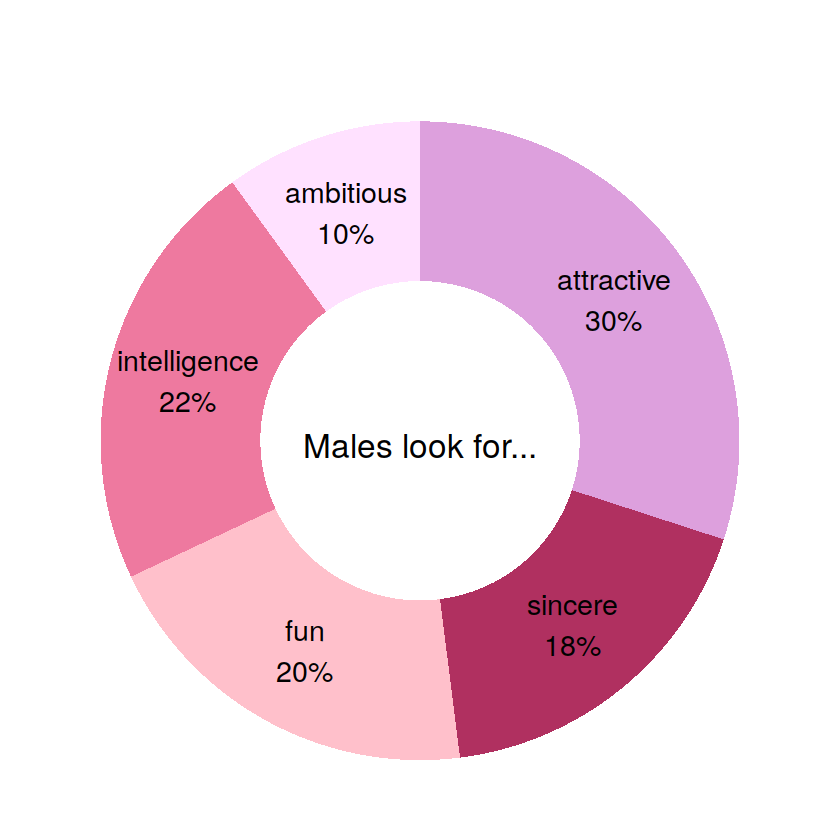

In [210]:
male + 
    ggtitle("Males look for...") + 
    theme(plot.title = element_text(size=20,hjust=0.5,vjust=-50))

In [203]:
# female calculations
sdfemale <- filter(sd1_1a1v3,gender==0) 
sdfemale$fraction = sdfemale$avg_score / sum(sdfemale$avg_score)
sdfemale$ymax = cumsum(sdfemale$fraction)
sdfemale$ymin = c(0, head(sdfemale$ymax, n=-1))
sdfemale$labelPosition <- (sdfemale$ymax + sdfemale$ymin) / 2
sdfemale$label <- paste0(sdfemale$attribute, "\n", sdfemale$avg_score, "%")

#female graph
female <- ggplot(sdfemale, aes(ymax=ymax, ymin=ymin, xmax=4, xmin=3, fill=attribute)) +
  geom_rect() +
  geom_text( x=3.5, aes(y=labelPosition, label=label), size=6) +
  scale_fill_brewer(palette=4) +
  coord_polar(theta="y") +
  xlim(c(2, 4)) +
  theme_void() +
  theme(legend.position = "none")

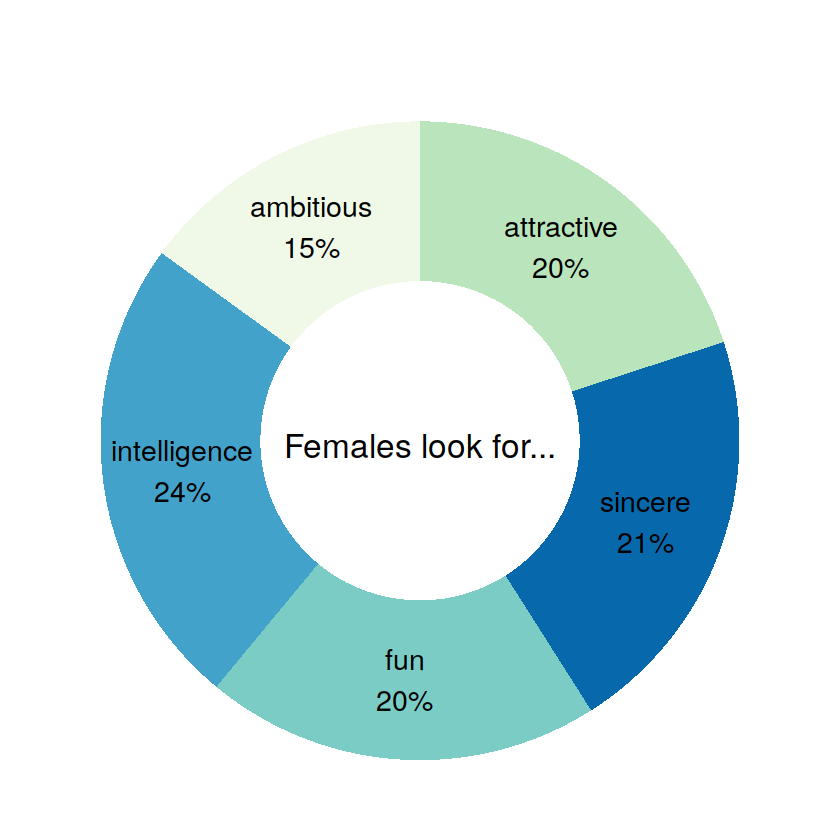

In [204]:
female + 
    ggtitle("Females look for...") + 
    theme(plot.title = element_text(size=20,hjust=0.5,vjust=-50))

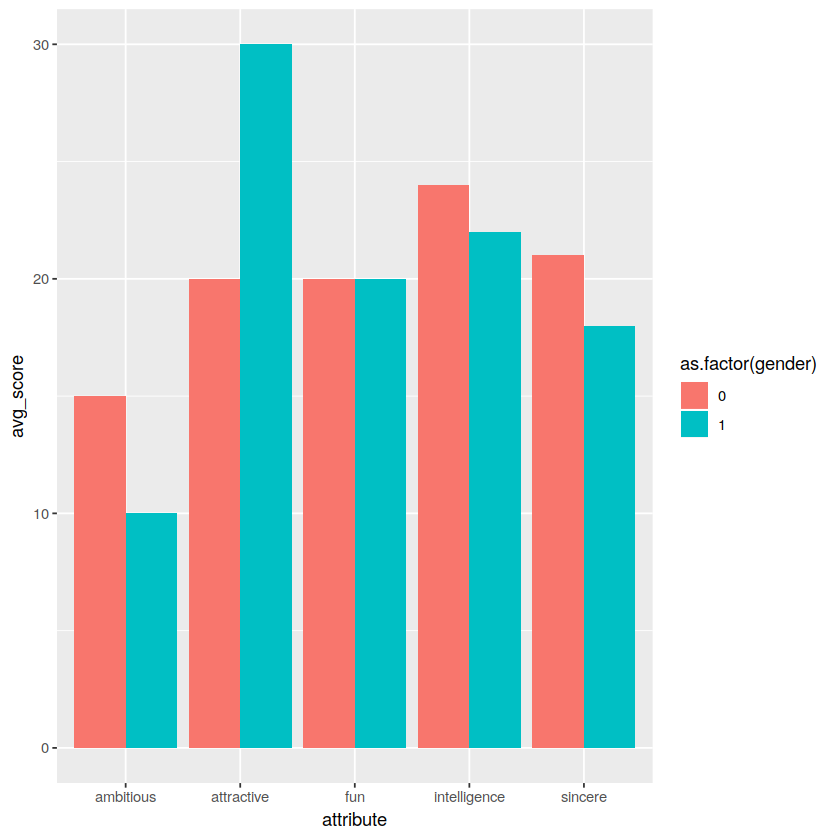

In [205]:
ggplot(sd1_1a1v3, aes(fill=as.factor(gender), y=avg_score, x=attribute)) + 
    geom_bar(position="dodge", stat="identity")

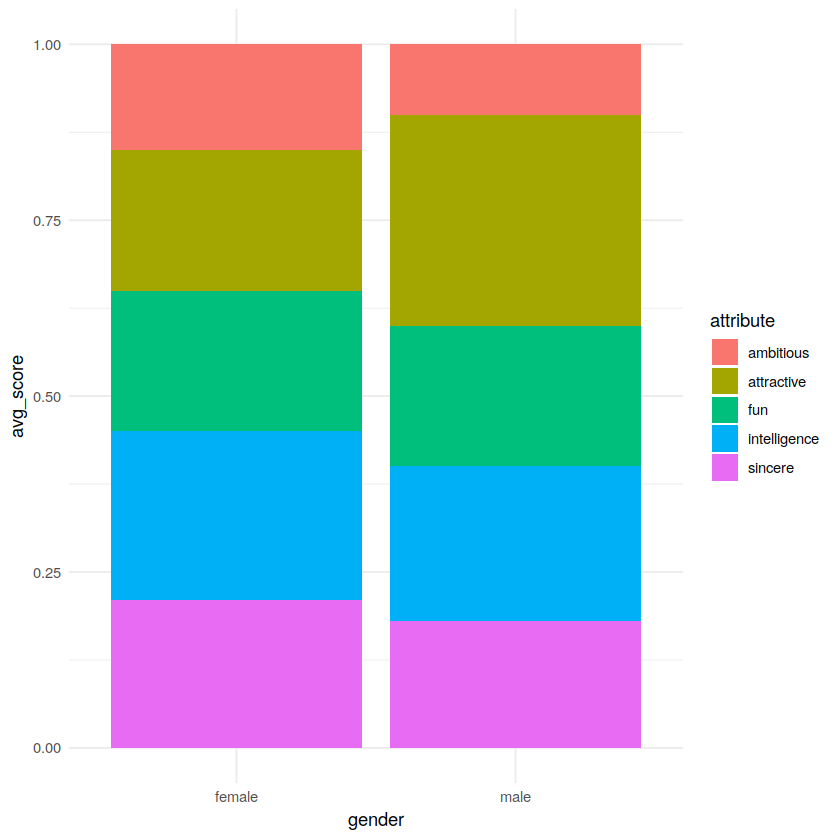

In [228]:
sd1_1a1v3[sd1_1a1v3 == 0]<-"female"
sd1_1a1v3[sd1_1a1v3 == 1]<-"male"

# Stacked + percent 
ggplot(sd1_1a1v3, aes(fill=attribute, y=avg_score, x=gender)) + 
    geom_bar(position="fill", stat="identity") + 
    theme_minimal()